# Principal-Agent Model

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

# Third-Degree Price Discrimination Model Overview


Third-degree price discrimination occurs when a monopolist divides consumers into distinct groups based on identifiable characteristics and charges different prices to each group. This form of price discrimination is based on differences in elasticity of demand among these groups, allowing the monopolist to maximize profits by tailoring prices to each segment's willingness to pay.

## Model Setup

### Assumptions

- **Segmentation Capability:** The monopolist is able to perfectly segment the market based on observable characteristics that correlate with willingness to pay, such as age, location, or time of purchase.
- **Non-Resale Condition:** It is assumed that the product sold cannot be resold by consumers, which prevents arbitrage that could undermine differentiated pricing.
- **Market Power:** The monopolist possesses enough market power to set prices for each segment without competition.

### Demand Function

The model assumes different inverse demand functions for each segment, reflecting varied sensitivity to price changes:

$$
p_A(x_A) 
$$
$$
p_B(x_B) 
$$

where $p_A$ and $p_B$ represent the prices charged to each segment and $x_A $ and $ x_B$ are the quantities demanded by each segment, respectively.

## Economic Rationale

The monopolist sets prices for each market segment by assessing the elasticity of demand for each group:
- **Higher Prices for Less Elastic Demand:** Groups with less elastic demand are charged higher prices.
- **Lower Prices for More Elastic Demand:** More price-sensitive groups are offered lower prices to maximize the quantity sold, hence increasing the overall revenue from these groups.

## Mathematical Formulation

The monopolist’s goal is to maximize profits by choosing optimal quantities to sell to each segment. The profit maximization problem can be formulated as:

$$
\max_{x_A, x_B} \left[ p_A(x_A) \cdot x_A + p_B(x_B) \cdot x_B - C(x_A + x_B) \right]
$$

where $ C(x_A + x_B) $ represents the total cost of producing the quantities$x_A $ and $ x_B$.

The first-order conditions for profit maximization are:

$$
p_A'(x_A) \cdot x_A + p_A(x_A) = MC(x_A + x_B)
$$
$$
p_B'(x_B) \cdot x_B + p_B(x_B) = MC(x_A + x_B)
$$

These conditions ensure that the marginal revenue from each segment equals the marginal cost of production, optimizing the allocation of production between the segments.

## Conclusion

Third-degree price discrimination allows a monopolist to increase profits by more closely aligning price with each consumer segment's willingness to pay. While this increases profits and can potentially lead to more efficient production levels compared to a single pricing strategy, it may raise concerns about fairness and access to goods, particularly for groups facing higher prices.


## Analytical solution

In this project we assume that the monopolist has the cost function $C(x)=x^2/2$.
There are two types of consumers which has the demands functions:
$$
D_A(p) = max(1000-p,0)
$$
$$
D_B(p) = max(700-p,0)
$$
Hence $D_A$ has a higher willingness to pay for one good than $D_B$.
To solve this analytical we need to find the inverse demand functions and aggeregate horizontal:

$$
D(p) = 
\begin{cases} 
0 & \text{for } p > 1000 \\
1000 - p & \text{for } 700 \leq p \leq 1000 \\
1700 - 2p & \text{for } 0 \leq p \leq 700
\end{cases}
$$

If the monopolist is price descriminating we can charge different prices for the two types of consumers we have the max problem:
$$
\max_{x_A, x_B} \left[ p_A(x_A) \cdot x_A + p_B(x_B) \cdot x_B - C(x_A + x_B) \right]
$$
which leads to
$$
MR_A(x_A) = MR_B(x_B) = MC(x_A + x_B)
$$



### Marginal Revenue and Cost

- Marginal Revenue for Type A: $MR_A = 1000 - 2x_A$
- Marginal Revenue for Type B: $MR_B = 700 - 2x_B$
- Marginal Cost: $MC = x_A + x_B$ (derived from the cost function)



## Equations

Substituting the given MR formulas and equating them to MC, we derive:
$$1000 - 2x_A = x_A + x_B$$
$$700 - 2x_B = x_A + x_B$$

## Solving the System of Equations

Rearranging the equations:
$$1000 = 3x_A + x_B$$
$$700 = x_A + 3x_B$$

From $1000 = 3x_A + x_B$, we express $x_B$ as:
$$x_B = 1000 - 3x_A$$

Substitute $x_B$ in the second equation:
$$700 = x_A + 3(1000 - 3x_A)$$
$$700 = x_A + 3000 - 9x_A$$
$$700 = 3000 - 8x_A$$
$$8x_A = 2300$$
$$x_A = \frac{2300}{8} = 287.5$$

Substitute $x_A$ back to find $x_B$:
$$x_B = 1000 - 3 \times 287.5$$
$$x_B = 1000 - 862.5$$
$$x_B = 137.5$$

The optimal quantities to maximize profits under third-degree price discrimination are:
- $x_A = 287.5$
- $x_B = 137.5$

These values suggest that the monopolist should produce and sell 287.5 units to type A consumers and 137.5 units to type B consumers to maximize profits, assuming perfect market segmentation and no resale among consumers.


## Prices for Each Consumer

- **Price for Type A Consumers**: \( p_A(287.5) = 1000 - 287.5 = 712.5 \)
- **Price for Type B Consumers**: \( p_B(137.5) = 700 - 137.5 = 562.5 \)

## Total Revenue

The total revenue \( R \) from selling to both types of consumers is calculated as:
$$ R = p_A(x_A) \cdot x_A + p_B(x_B) \cdot x_B $$
$$ R = 712.5 \cdot 287.5 + 562.5 \cdot 137.5 = 204843.75 + 77343.75 = 282187.5 $$

## Total Cost

Using the cost function $ C(x) = \frac{x^2}{2} $, where $ x = 425 $:
$$ C(425) = \frac{425^2}{2} = \frac{180625}{2} = 90312.5 $$

## Profit Calculation

The profits $\pi $ are given by:
$$ \pi = R - C(x) $$
$$ \pi = 282187.5 - 90312.5 = 191875 $$

## Conclusion

The monopolist sets the prices at \$712.5 for Type A consumers and \$562.5 for Type B consumers, resulting in a total profit of \$191875. This example illustrates how third-degree price discrimination can effectively maximize profits by catering to different price sensitivities among consumer segments.

## Numerical solution

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the inverse demand functions for each consumer type
def p_A(x_A):
    return 1000 - x_A

def p_B(x_B):
    return 700 - x_B

# Define the cost function
def total_cost(x):
    return x**2 / 2

# Define the profit function
def profit(x_A, x_B):
    total_revenue = p_A(x_A) * x_A + p_B(x_B) * x_B
    total_cost = (x_A + x_B)**2 / 2
    return total_revenue - total_cost

# Define marginal cost function
def marginal_cost(x):
    return x

# Using numpy to create a grid of x_A and x_B values
x_A = np.linspace(0, 1000, 10000)  # Using 1000 points for x_A
x_B = np.linspace(0, 700, 10000)   # Using 1000 points for x_B

# Create a grid of x_A and x_B values
X_A, X_B = np.meshgrid(x_A, x_B)

# Calculate profits for each combination of x_A and x_B 
Profits = profit(X_A, X_B)


# Find the index of the maximum profit
max_profit_idx = np.argmax(Profits)
optimal_x_A = X_A.flatten()[max_profit_idx]
optimal_x_B = X_B.flatten()[max_profit_idx]
optimal_profit = Profits.flatten()[max_profit_idx]

# Finding the prices given the optimal quantities
optimal_price_A = p_A(optimal_x_A)
optimal_price_B = p_B(optimal_x_B)


# Print the optimal quantities, prices and profit
print(f'The optimal quantity sold to Type A is {optimal_x_A:.2f}')
print(f'The optimal quantity sold to Type B is {optimal_x_B:.2f}')
print(f'The optimal price for Type A is {optimal_price_A:.2f}')
print(f'The optimal price for Type B is {optimal_price_B:.2f}')
print(f'The maximum profit is {optimal_profit:.2f}')
print(f'The total cost is {(optimal_x_A + optimal_x_B)**2 / 2:.2f}')




The optimal quantity sold to Type A is 287.53
The optimal quantity sold to Type B is 137.49
The optimal price for Type A is 712.47
The optimal price for Type B is 562.51
The maximum profit is 191875.00
The total cost is 90322.06


It can be seen that there is around 287.5 goods sold for type a and 137.5 good for type B. This is very close to the analytical solution which suggested - $x_A = 287.5$ $x_B = 137.5$. The cost function is a little lower, than the analytical, but overall the profits matches exactly what the analytical solution suggest. The numerical solution could be made more precise by upping the number of points for each type of consumer, but it comes at a cost of run time of the code

# Further analysis

## Plotting the profit surface

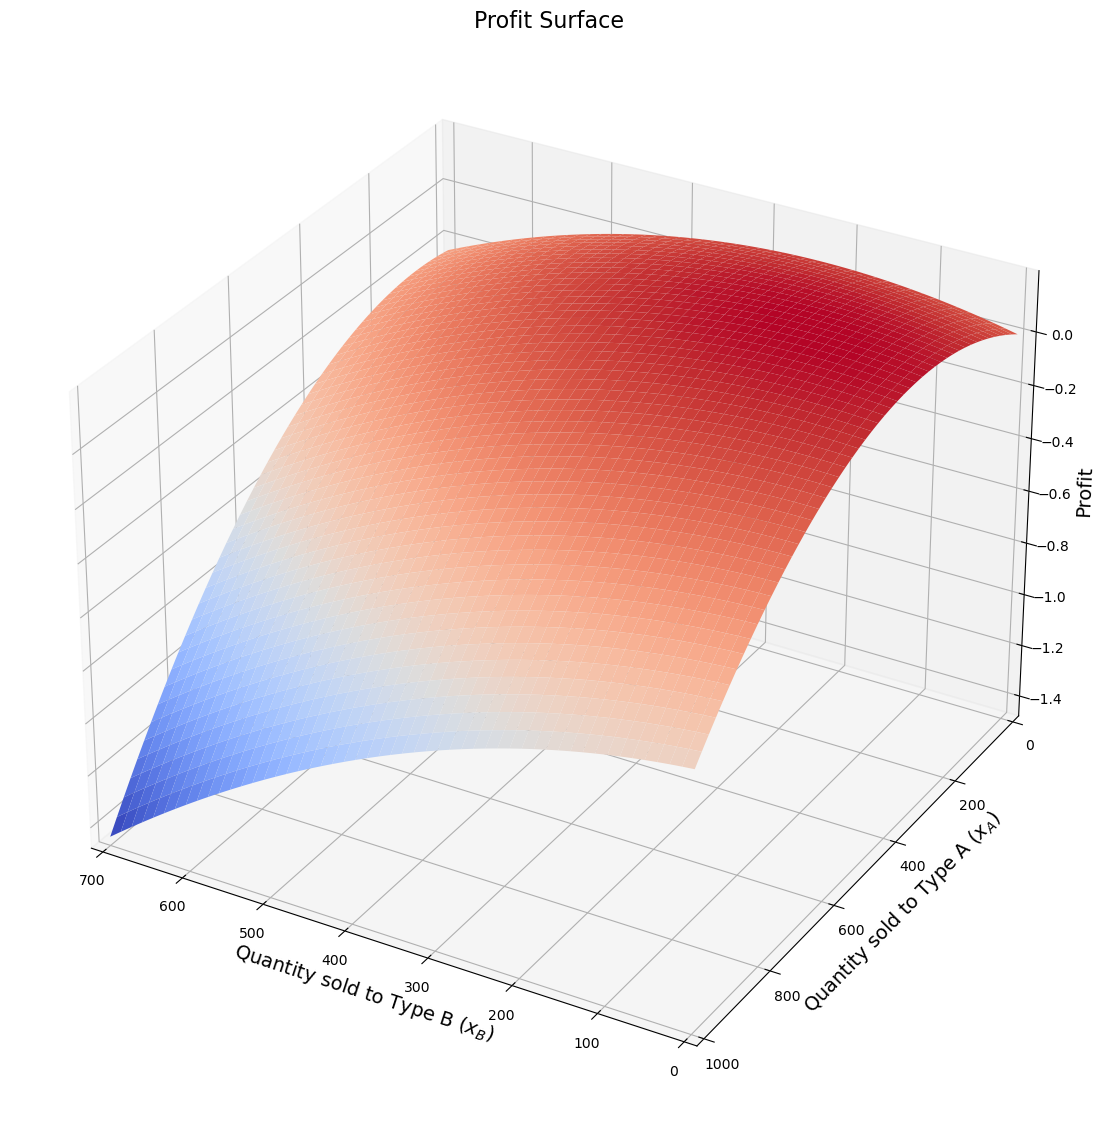

In [7]:
# Plotting the profit surface

fig = plt.figure(figsize=(16, 14))  # Increase the size of the plot
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X_B, X_A, Profits, cmap='coolwarm', edgecolor='none')  # Swap X_A and X_B
ax.set_xlabel('Quantity sold to Type B ($x_B$)', fontsize=14)  # Change the x label
ax.set_ylabel('Quantity sold to Type A ($x_A$)', fontsize=14)  # Change the y label
ax.set_zlabel('Profit', fontsize=14)  # Increase the size of the z label
ax.set_title('Profit Surface', fontsize=16)  # Increase the size of the title
ax.view_init(30, 120)  # Change the viewing angle
ax.set_xlim(0, np.max(X_B))  # Set x-axis limits
ax.set_ylim(0, np.max(X_A))  # Set y-axis limits
ax.set_zlim(np.min(Profits), np.max(Profits))  # Set z-axis limits
plt.show()


On the plot can it be seen all the different types combination of goods sold, and profits. We can see that the maxiumum value we found is correct, and there is a lot of combinations where the profits actually are negative.

In [16]:
import ipywidgets as widgets
from IPython.display import display

# Define a function to plot with cost multiplier as a parameter
def plot_with_cost_multiplier(cost_multiplier):
    mc_values = marginal_cost(cost_multiplier * quantities)

    plt.figure(figsize=(10, 6))
    plt.plot(quantities, prices_A, label='Demand Curve Type A')
    plt.plot(quantities, prices_B, label='Demand Curve Type B')
    plt.plot(quantities, mc_values, label='Marginal Cost', linestyle='--', color='red')
    plt.xlabel('Quantity')
    plt.ylabel('Price')
    plt.title('Demand Curves and Marginal Cost')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1200)
    plt.show()

# Create a slider widget
slider = widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description='Cost Multiplier')

# Display the interactive plot
widgets.interact(plot_with_cost_multiplier, cost_multiplier=slider)

interactive(children=(FloatSlider(value=1.0, description='Cost Multiplier', max=10.0, min=0.1), Output()), _do…

<function __main__.plot_with_cost_multiplier(cost_multiplier)>

# Conclusion

Add concise conclusion. 